# Y a-t-il des différences selon l'âge et le genre dans la fréquence de souvenirs des rêves ?

**Author** : Laetitia Carli

**Date** : June 2025

## 1. Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import networkx as nx

## 2. Directed acyclic graph

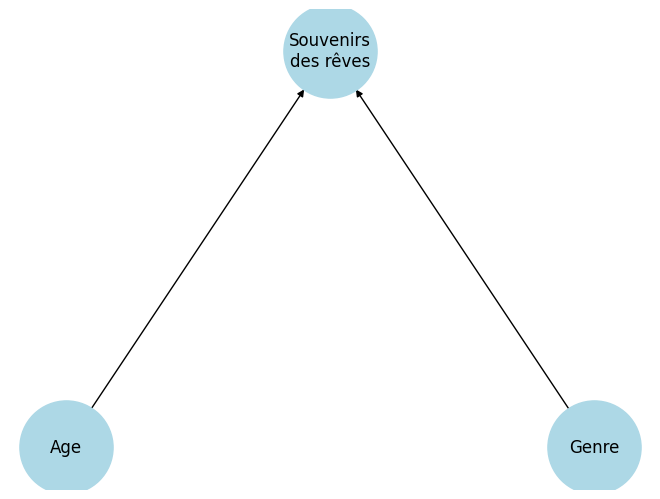

In [2]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Souvenirs\ndes rêves']
G.add_nodes_from(nodes)

edges = [('Age', 'Souvenirs\ndes rêves'), ('Genre', 'Souvenirs\ndes rêves')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4500, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

## 3. Data import 

In [3]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 4. Data manipulation

### 4.1 Rename columns

In [5]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})

In [6]:
df = df.rename(columns={'Genre ': 'Genre'})

In [7]:
df = df.rename(columns={'Je me souviens souvent de mes rêves.': 'souvenirs'})

### 4.2 Select and clean the data

In [8]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)


In [9]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [10]:
df = df[df['Genre'].isin(["Femme", "Homme"])]

In [11]:
#df = df[df['Genre'] != "Je ne souhaite pas répondre"]

## 5. Data description

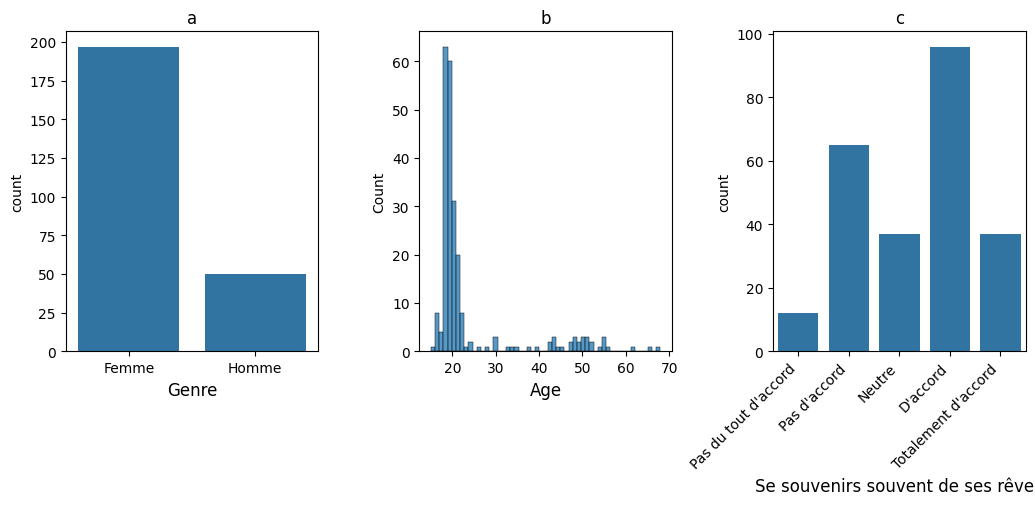

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x = df['Genre'], ax = axs[0])
axs[0].set_xlabel("Genre", fontsize = 12)
axs[0].set_title("a")

sns.histplot(x = df['Age'], ax = axs[1])
axs[1].set_xlabel("Age", fontsize = 12)
axs[1].set_title("b")

sns.countplot(x = df['souvenirs'], order = ["Pas du tout d'accord",
    "Pas d'accord", "Neutre","D'accord", "Totalement d'accord"], ax = axs[2]) 
for tick in axs[2].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')
axs[2].set_xlabel("Se souvenirs souvent de ses rêves", fontsize = 12)
axs[2].set_title("c")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

## 6. Data modelling

In [13]:
df.dropna(subset = ['Age', 'Genre', 'souvenirs'], inplace=True)

In [14]:
pd.set_option('future.no_silent_downcasting', True)
df['souvenirs'] = df['souvenirs'].astype(str).str.strip().str.lower()
souvenirs_dict = {"pas du tout d'accord" : 1,
                     "pas d'accord": 2,
                     "neutre" : 3,
                     "d'accord" : 4,
                     "totalement d'accord": 5
                    }
df.loc[:,'souvenirs'] = df['souvenirs'].replace(souvenirs_dict)
df['souvenirs'] = df['souvenirs'].astype('Int64')

In [15]:
model = smf.ols(formula = 'souvenirs ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              souvenirs   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.851
Date:                Thu, 19 Jun 2025   Prob (F-statistic):            0.00862
Time:                        09:06:22   Log-Likelihood:                -366.04
No. Observations:                 238   AIC:                             738.1
Df Residuals:                     235   BIC:                             748.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7778      0.177     21.336      0.000       3.429       4.127
Genre[T.Homme]    -0.3378      0.182     -1.856      0.065      -0.696       0.021
Age               -0.0161      0.007     -2.398      0.017      -0.029      -0.003
==============================================================================
Omnibus:                       43.547   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.294
Skew:                          -0.301   Prob(JB):                      0.00130
Kurtosis:                       2.012   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""